# Исследование объявлений о продаже квартир

**В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.**

### Откройте файл с данными и изучите общую информацию. 

In [366]:
#импортируем библиотеку pandas
import pandas as pd

In [367]:
#читаем csv-файл
absolute_path = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Исследование объявлений о продаже квартир\real_estate_data.csv'

data = pd.read_csv(absolute_path)

### Предобработка данных

In [368]:
#выведем 20 первых строчек датасета на экран
data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [369]:
#применим знак табуляции \t, чтобы разделить "склеенные" в таблице данные
data = pd.read_csv(absolute_path, sep='\t')

In [370]:
#проверим, что это сработало
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [371]:
#исправим отображение таблицы, чтобы отображались все столбцы
pd.set_option('display.max_columns', None)

In [372]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [373]:
#выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

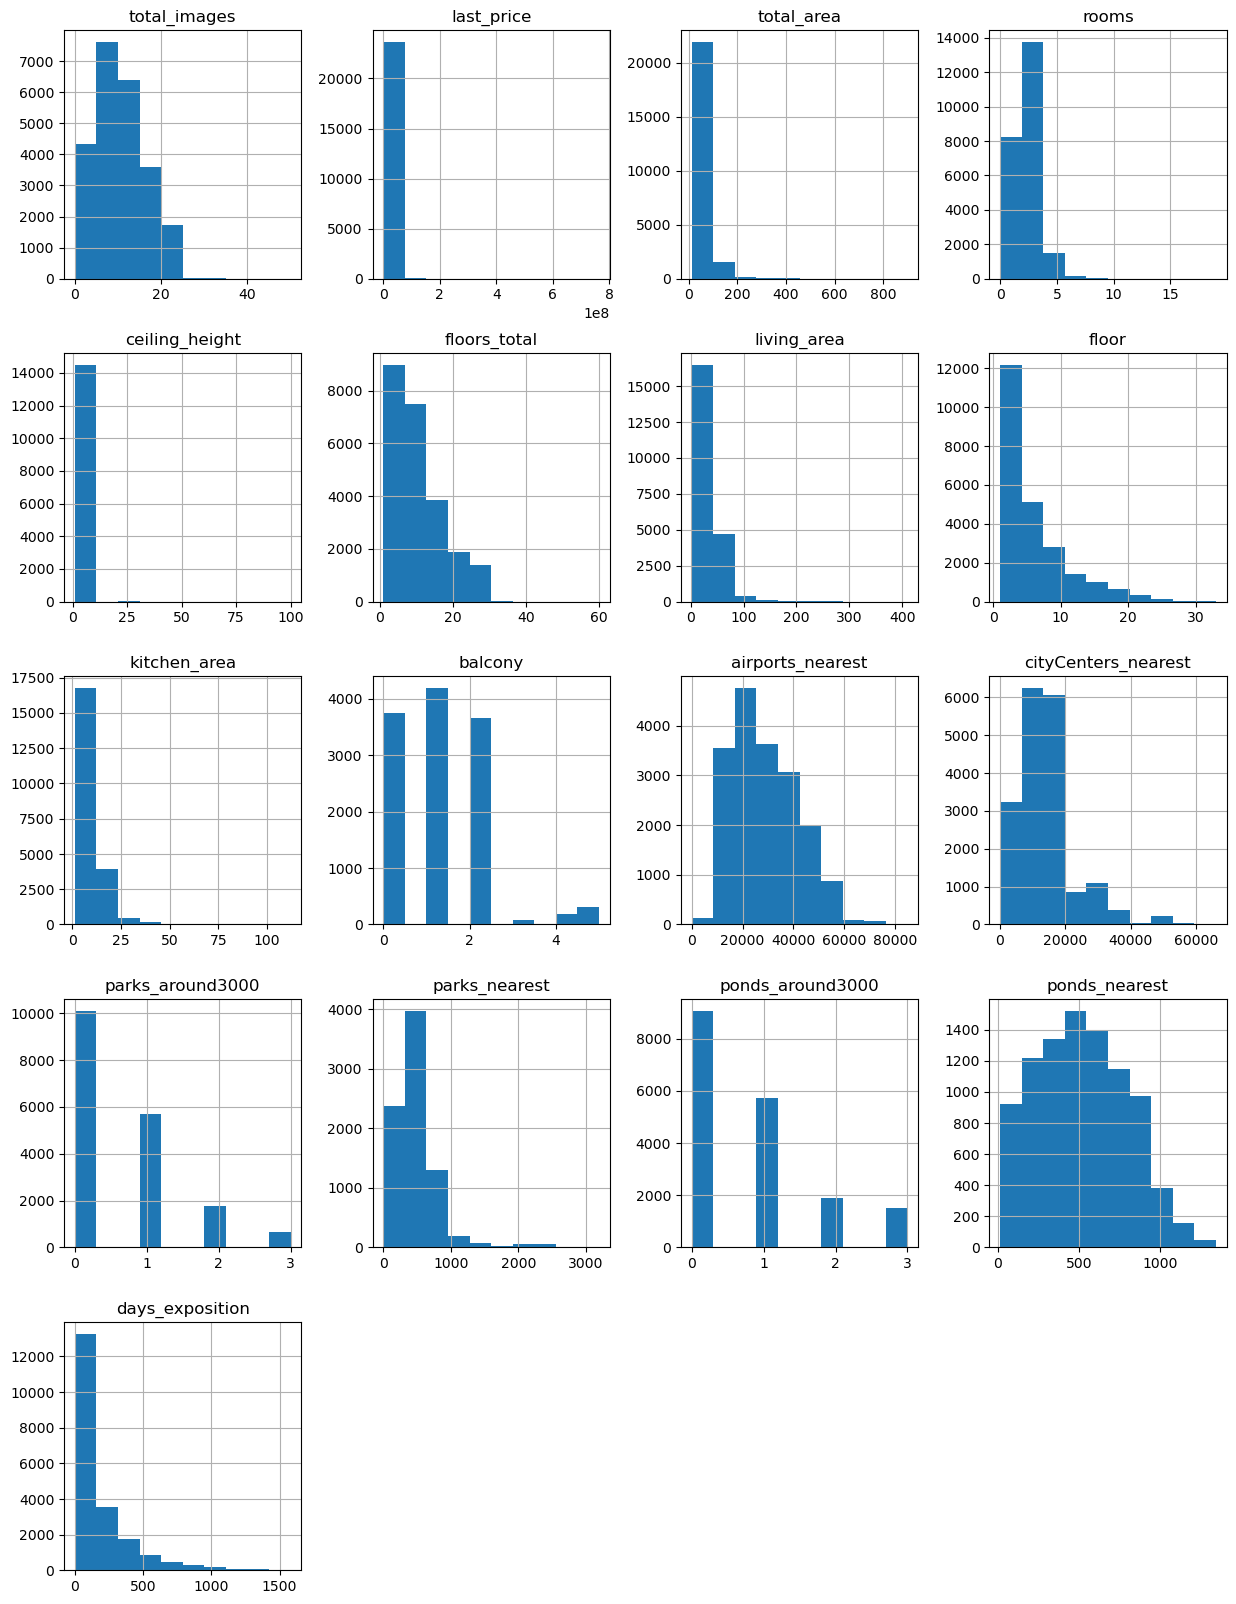

In [374]:
#Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

**Можем сделать вывод, что в некоторых столбцах неправильный тип данных, несоответствующий значениям в строках; в некоторых столбцах видно наличие пропусков и дубликатов. В столбце 'balcony' есть странные значения.**

In [375]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Мы видим пропуски в столбце 'balcony'. Скорее всего там, где их число не указано, их нет, так что можно заменить значения в строках на 0. По остальным столбцам с пропусками логичную замену предложить не удастся, так что оставим эти значения пустыми.**

In [376]:
#меняем пропущенные значения в столбце 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)

In [377]:
#проверяем, что замена успешно произведена
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Теперь заполним пропуски в столбце с высотой потолков медианным значением столбца 'ceiling_height'.**

In [378]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [379]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Поменяем типы данных в тех ячейках, где по логике они указаны неправильно (это нужно, чтобы в дальнейшем можно было производить математические операции с данными из этих ячеек):**

In [380]:
data['last_price'] = data['last_price'].astype('float')

In [381]:
data['total_area'] = data['total_area'].astype('float')

In [382]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [383]:
data['ceiling_height'] = data['ceiling_height'].astype('float')

In [384]:
data['floors_total'] = data['floors_total'].astype('float')

In [385]:
data['living_area'] = data['living_area'].astype('float')

In [386]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [387]:
data['kitchen_area'] = data['kitchen_area'].astype('float')

In [388]:
data['balcony'] = data['balcony'].astype('float')

In [389]:
data['balcony'] = data['balcony'].astype('int')

In [390]:
data['airports_nearest'] = data['airports_nearest'].astype('float')

In [391]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')

In [392]:
data['parks_around3000'] = data['parks_around3000'].astype('float')

In [393]:
data['parks_nearest'] = data['parks_nearest'].astype('float')

In [394]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float')

In [395]:
data['ponds_nearest'] = data ['ponds_nearest'].astype('float')

In [396]:
data['days_exposition'] = data['days_exposition'].astype('float')

In [397]:
#проверяем, что типы данных изменились
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [398]:
#найдем неявные дубликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Избавимся от лишних слов в названиях населённых пунктов, а заодно и от дубликатов:**

In [399]:
data['locality_name'] = data['locality_name'].str.replace('поселок', '')

In [400]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', '')

In [401]:
data['locality_name'] = data['locality_name'].str.replace('городского типа', '')

In [402]:
data['locality_name'] = data['locality_name'].str.replace('городской', '')

In [403]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '')

In [404]:
data['locality_name'] = data['locality_name'].str.replace('село', '')

In [405]:
data['locality_name'] = data['locality_name'].str.replace('станции', '')

In [406]:
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '')

In [407]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный', '')

In [408]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '')

In [409]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')

In [410]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [411]:
data['locality_name'] = data['locality_name'].str.strip()

In [412]:
#проверяем, что сработало
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [413]:
#найдем аномальные значения в столбце 'ceiling_height'
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [414]:
#исправляем данные по высоте потолков на корректные
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height'] / 10

In [415]:
#проверяем, что аномальные значения изменились
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [416]:
#посмотрим информацию по данным
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.698721,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.253208,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<Axes: >

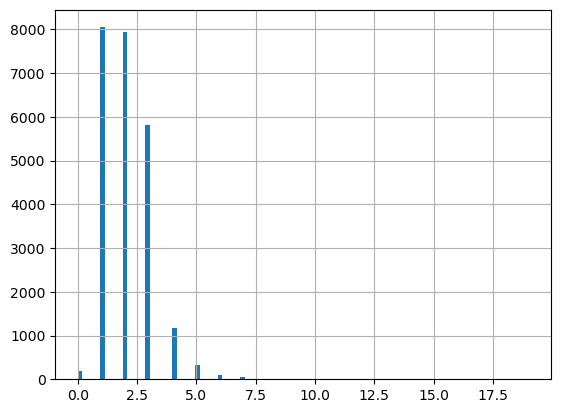

In [417]:
#построим гистограмму, чтобы понять, какие значения для столбца с количеством комнат являются редкими
data['rooms'].hist(bins=100)

In [418]:
#будем считать, что больше 8 комнат - аномалия, и удалим строки с такими значениями
data = data[data['rooms']<8]

<Axes: >

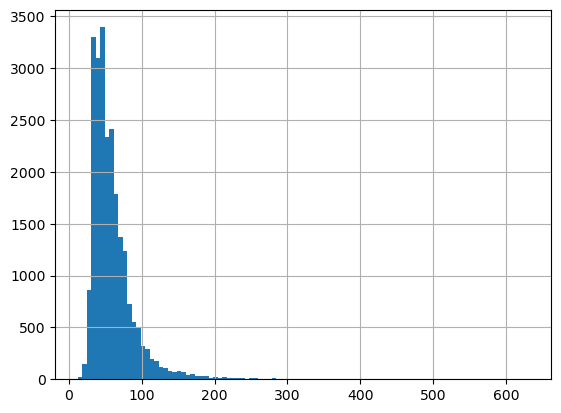

In [419]:
#построим гистограмму, чтобы понять, какие значения для столбца с общей площадью являются редкими
data['total_area'].hist(bins=100)

In [420]:
#будем считать, что квартиры больше 400 метров - аномалия, и удалим строки с такими значениями
data = data[data['total_area']<400]

<Axes: >

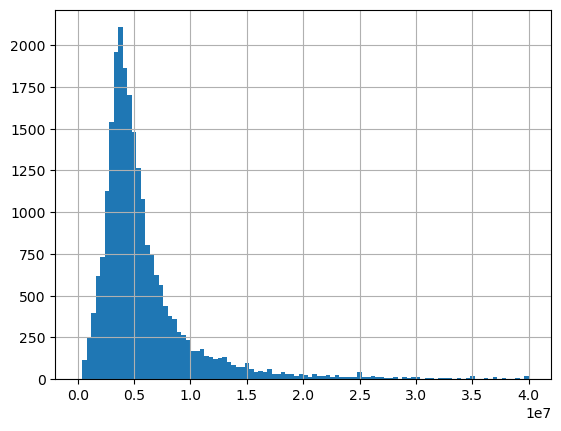

In [421]:
#построим гистограмму, чтобы понять, какие значения для столбца со стоимостью являются редкими
data['last_price'].hist(range=(0, 40000000), bins=100)

In [422]:
#будем считать, что стоимость больше 30 000 000 млн - редкость, и удалим строки с такими значениями
data = data[data['last_price']<30000000]

In [423]:
#посмотри, сколько строк осталось
data.shape

(23351, 22)

**Проверим, не слишком ли много строк мы отбросили. 23351 / 23699 * 100 = 98,53. Это в районе полутора процентов, все нормально.**

### Посчитайте и добавьте в таблицу новые столбцы

In [424]:
#добавим столбец с ценой одного м2
data['price_per_m2'] = data['last_price'] / data['total_area']

In [425]:
#проверим, что всё в порядке
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474


In [426]:
#добавим столбец с днём недели публикации объявления
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [427]:
#проверим, что всё в порядке
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0


In [428]:
#добавим столбец с месяцем публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month

In [429]:
#проверим, что всё в порядке
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day,publication_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9


In [430]:
#добавим столбец с годом публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year

In [431]:
#проверим, что всё в порядке
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018


In [432]:
#создадим функцию для определения типа этажа
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [433]:
#добавим столбец с типом этажа
data['floor_type'] = data.apply(lambda row: floor_category(row), axis=1)

In [434]:
#проверим, что новый столбец отображается корректно
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day,publication_month,publication_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой


In [435]:
#создадим столбец с расстоянием до центра города в км
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [436]:
#округлим данные столбца до целых чисел
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [437]:
#проверим, что новый столбец отображается корректно
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

<Axes: >

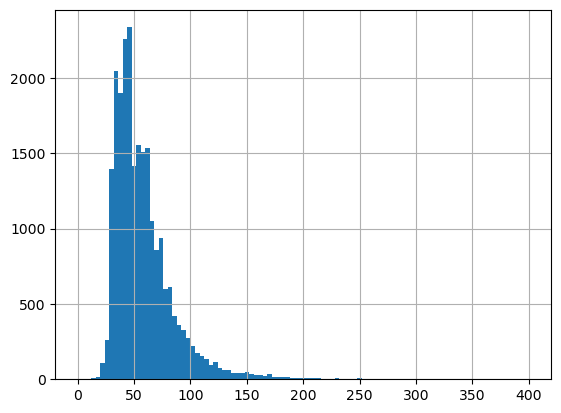

In [438]:
#построим гистограмму по общей площади квартиры
data['total_area'].hist(range=(0, 400), bins=100)

**По гистограмме можно сделать вывод, что преобладающее большинство квартир с площадью менее 50 м2, а квартиры площадью 200 м2 и более встречаются очень редко.**

<Axes: >

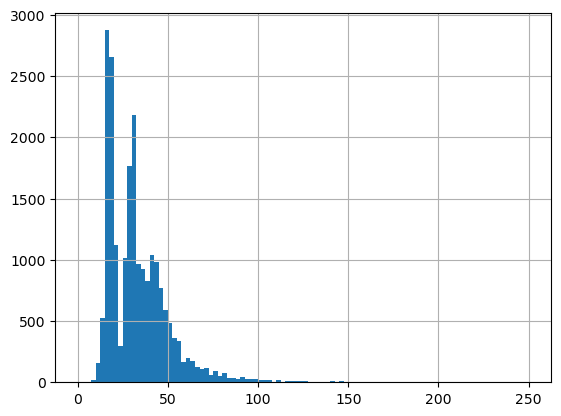

In [439]:
#построим гистограмму по жилой площади квартиры
data['living_area'].hist(range=(0, 250), bins=100)

**По гистограмме мы видим два пика. Часто бывают квартиры с жилой площадью около 20 м2 и около 30 м2. Более 100 м2 практически не встречается.**

<Axes: >

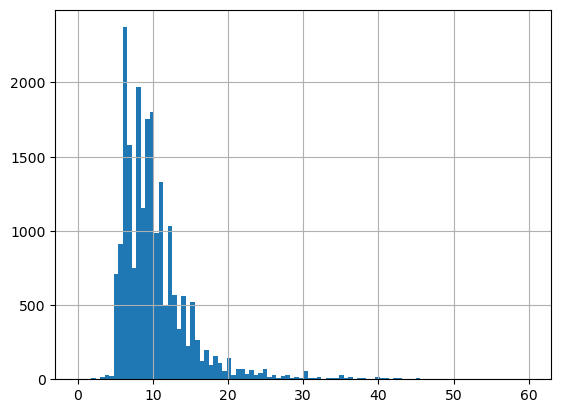

In [440]:
#построим гистограмму по площади кухни
data['kitchen_area'].hist(range=(0, 60), bins=100)

**Видим, что часто в квартирах площадь кухни составляет 6 м2. В целом распространены кухни площадью до 10 м2.**

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000., 16000000.]),
 [Text(-2000000.0, 0, '−2000000'),
  Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2000000'),
  Text(4000000.0, 0, '4000000'),
  Text(6000000.0, 0, '6000000'),
  Text(8000000.0, 0, '8000000'),
  Text(10000000.0, 0, '10000000'),
  Text(12000000.0, 0, '12000000'),
  Text(14000000.0, 0, '14000000'),
  Text(16000000.0, 0, '16000000')])

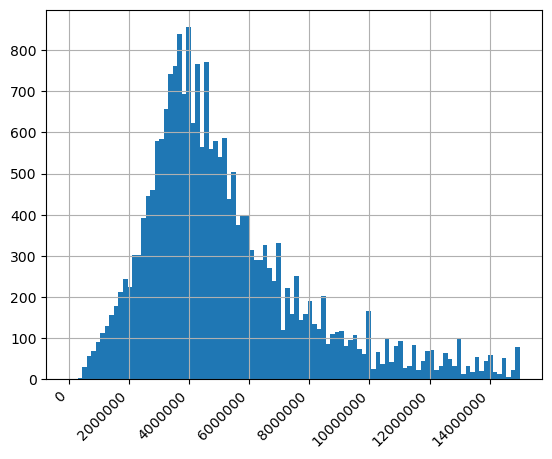

In [441]:
#построим гистограмму по цене объекта
data['last_price'].hist(range=(0, 15000000), bins=100)
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain', axis='x')
# Наклонить подписи оси x
plt.xticks(rotation=45, ha='right')

**По построенной диаграмме видно, что много квартир сосредоточено в ценовом диапазоне 3 - 5 млн руб.**

<Axes: >

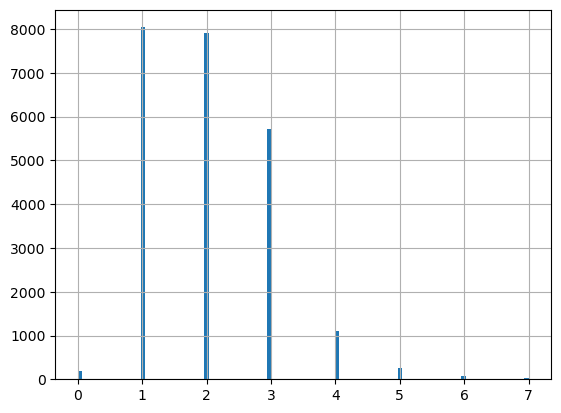

In [442]:
#построим гистограмму по количеству комнат
data['rooms'].hist(bins=100)

**По построенной гистограмме можно сделать вывод, что однокомнатных и двухкомнатных квартир примерно поровну, и они являются самыми распространенными. Также довольно часто встречаются трехкомнатные квартиры. Более пяти комнат - редкость.**

<Axes: >

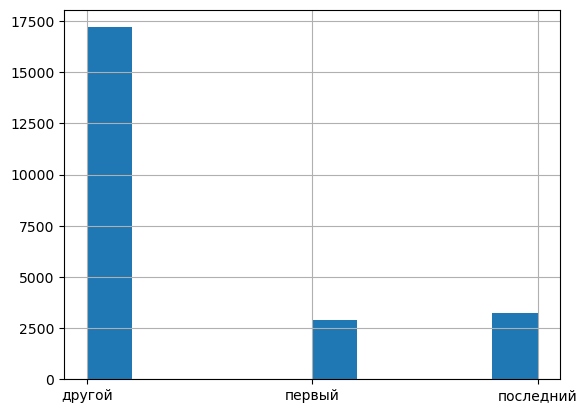

In [443]:
#построим гистограмму по типу этажа
data['floor_type'].hist(bins=10)

**По гистограмме видно, что квартир на последнем этаже немного больше, чем квартир на первом. Всю остальную долю, ожидаемо, занимают квартиры на других этажах.**

<Axes: >

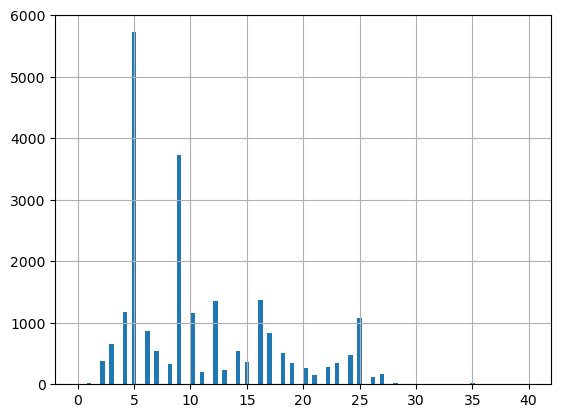

In [444]:
#построим гистограмму по количеству этажей в доме
data['floors_total'].hist(range=(0, 40), bins=100)

**Больше всего пятиэтажных домов. Также много девятиэтажек. Четырёх-, двенадцати-, шестнадцати- и двадцатипятиэтажки тоже встречаются чаще всех прочих. Выше 30 этажей почти не представлены.**

<Axes: >

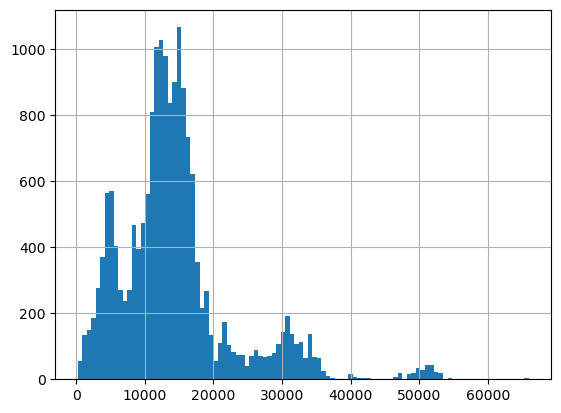

In [445]:
#построим гистограмму по расстоянию до центра города в м
data['cityCenters_nearest'].hist(bins=100)

**Большинство квартир находятся на расстоянии примерно 12000 метров от центра города.**

<Axes: >

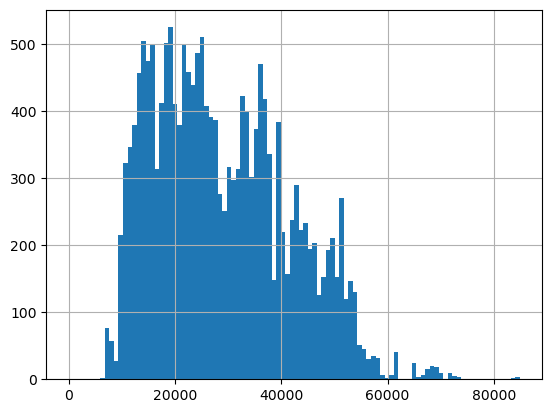

In [446]:
#построим гистограмму по расстоянию до ближайшего аэропорта
data['airports_nearest'].hist(bins=100)

**Есть самая преобладающая группа квартир, расположенных на расттоянии примерно от 15000 м до 25000 м от аэропорта. Чуть меньшая группа - в диапазоне примерно от 35000 м до 40000 м.**

<Axes: >

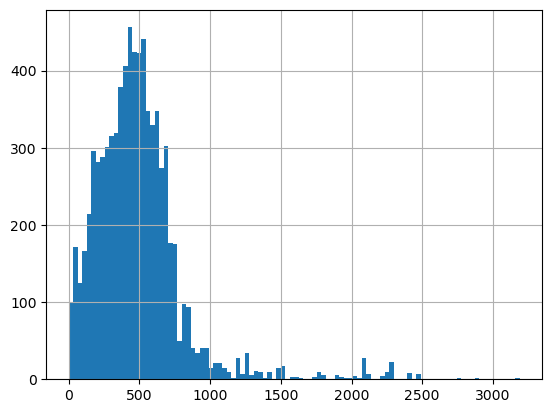

In [447]:
#построим гистограмму по расстоянию до ближайшего парка
data['parks_nearest'].hist(bins=100)

**Мы видим, что в большинстве случаев парк расположен приблизительно в 500 м от местонахождения квартиры. Популярный диапазон - от 100 до 800 метров**

<Axes: >

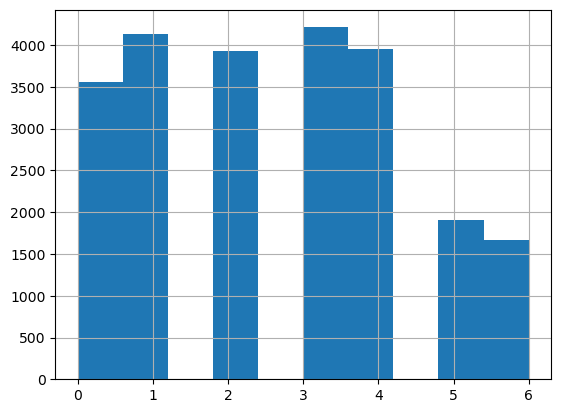

In [448]:
#построим гистограмму по дню размещения объявления
data['publication_day'].hist(bins=10)

**По полученной гистограмме можно сделать вывод, что наиболее часто объявления размещали по четвергам и вторникам. В выходные дни было размещено мало объявлений.**

<Axes: >

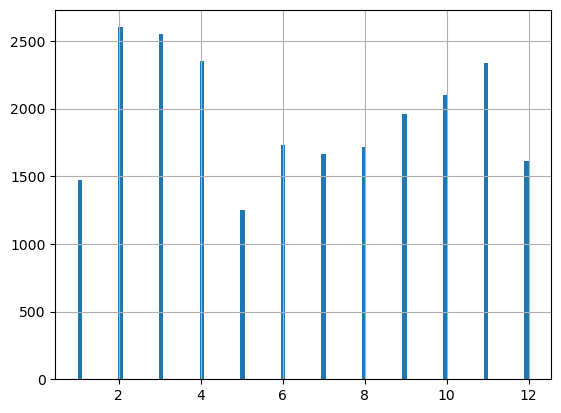

In [449]:
#построим гистограмму по месяцу размещения объявления
data['publication_month'].hist(bins=100)

**Сделаем вывод, что преобладающее число объявлений было размещено в феврале, марте и апреле. В мае был явный спад. В летние месяцы видна стабильность, а с сентября по ноябрь наблюдается явный скачок и увеличение подач объявлений.**

<Axes: >

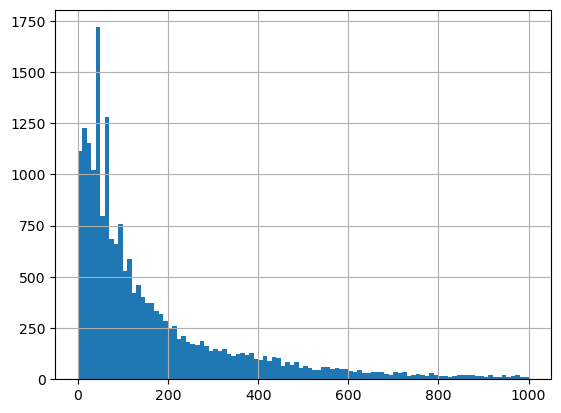

In [450]:
#построим гистограмму по количеству дней размещения объявления
data['days_exposition'].hist(range=(0, 1000), bins=100)

<Axes: >

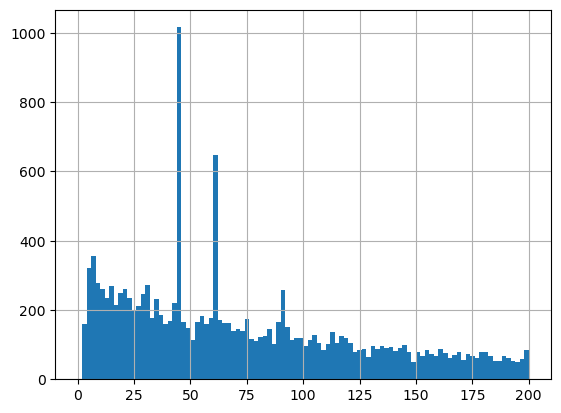

In [451]:
#увеличим масштаб, чтобы посмотреть точнее распространенные значения
data['days_exposition'].hist(range=(0, 200), bins=100)

**На гистограмме видно, что зачастую квартира продается в районе двух месяцев. Но в редких случаях бывает, что продажа занимает и больше года, а иногда и несколько лет. Возможно, автоматически объявление размещается продолжительностью на 45 или 60 дней. И зачастую оно "висит" до окончания срока, потому что его не потрудились снять с продажи.**

In [452]:
#посчитаем медиану столбца 'days_exposition'
data['days_exposition'].median()

95.0

In [453]:
#посчитаем среднее столбца 'days_exposition'
data['days_exposition'].mean()

179.28797077841946

**По посчитанному значению медианы можно сделать вывод, что чаще всего продажа происходит в районе 3 месяцев. Встречаются и продажи за период 100-400 дней. Продажи дольше 800 дней можно считать очень редкими. Продажи в течение двух недель можно считать быстрыми.**

In [454]:
#посчитаем корреляцию цены квартиры к её общей площади
data['last_price'].corr(data['total_area'])

0.7898407227631417

<Axes: xlabel='total_area'>

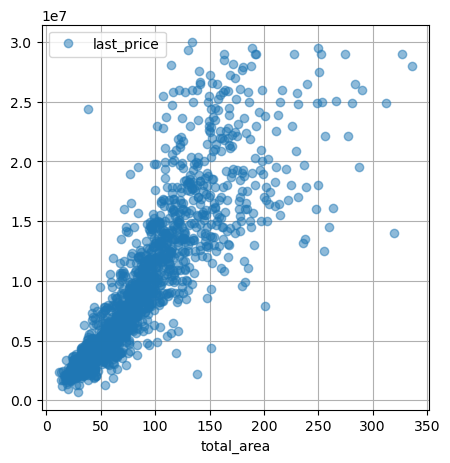

In [455]:
#построим диаграмму рассеяния
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', alpha=0.5, figsize=(5, 5))

**Можно сделать вывод, что цена квартиры и ее общая площадь коррелируют между собой.**

In [456]:
#посчитаем корреляцию цены квартиры к жилой площади
data['last_price'].corr(data['living_area'])

0.6872274285856192

<Axes: xlabel='living_area'>

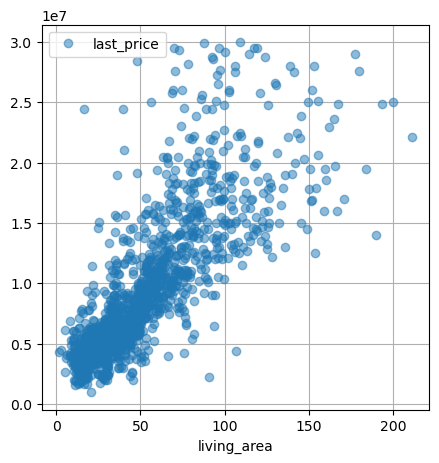

In [457]:
#построим диаграмму рассеяния
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', alpha=0.5, figsize=(5, 5))

**Цена квартиры и жилая площадь коррелируют.**

In [458]:
#посчитаем корреляцию цены квартиры к площади кухни
data['last_price'].corr(data['kitchen_area'])

0.604385524009328

<Axes: xlabel='kitchen_area'>

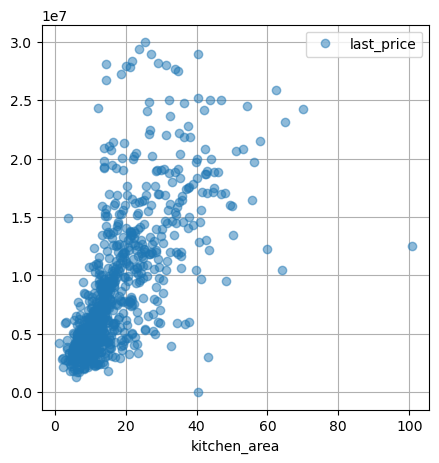

In [459]:
#построим диаграмму рассеяния
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', alpha=0.5, figsize=(5, 5))

**Цена квартиры и площадь кухни в ней так же коррелируют между собой.**

In [460]:
#посчитаем корреляцию цены квартиры к количеству комнат
data['last_price'].corr(data['rooms'])

0.5129865892909925

<Axes: xlabel='rooms'>

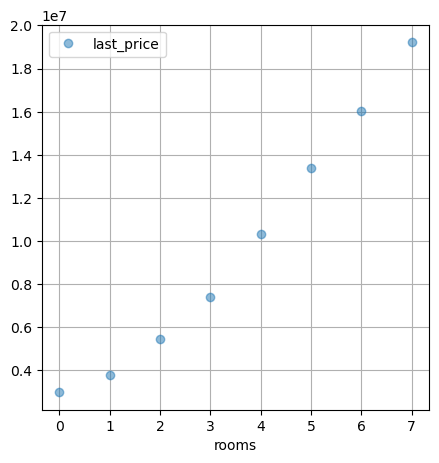

In [461]:
#построим диаграмму рассеяния
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', alpha=0.5, figsize=(5, 5))

**Корреляция цены к количеству комнат присутствует, но слабовыражена.**

<Axes: xlabel='floor_type'>

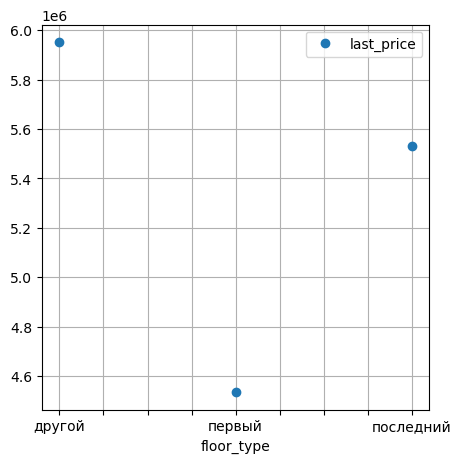

In [462]:
#построим диаграмму рассеяния, чтобы выяснить корреляцию между ценой квартиры и типом этажа
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o', alpha=1, figsize=(5, 5))

**Можно сделать вывод, что квартиры на первом этаже обычно стоят дешевле остальных, а квартиры на средних этажах - самые дорогие.**

<Axes: xlabel='publication_day'>

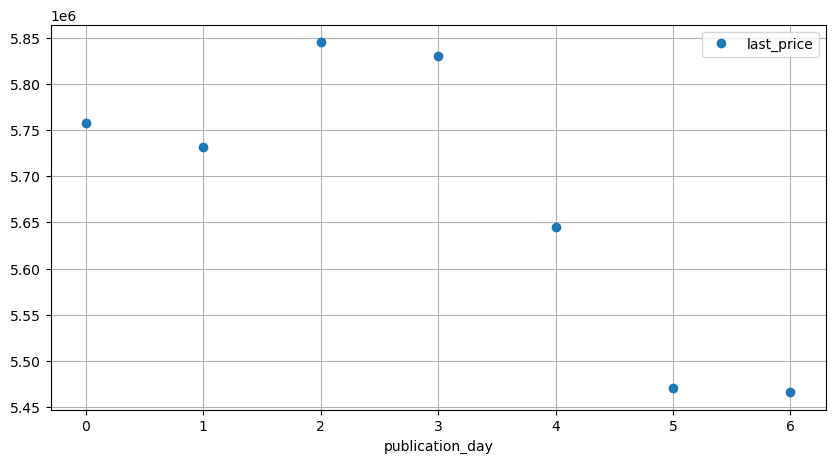

In [463]:
#построим диаграмму рассеяния, чтобы выяснить корреляцию между ценой квартиры и днём размещения объявления
data.pivot_table(index='publication_day', values='last_price').plot(grid=True, style='o', alpha=1, figsize=(10, 5))

**На основе диаграммы можно сделать вывод, что корреляция между ценой квартиры и днём недели размещения объявления присутствует - квартиры, выложенные с пятницы по воскресенье, обычно дешевле. Думаю, это можно объяснить тем, что они размещались собственниками, а не риелторами.**

<Axes: xlabel='publication_month'>

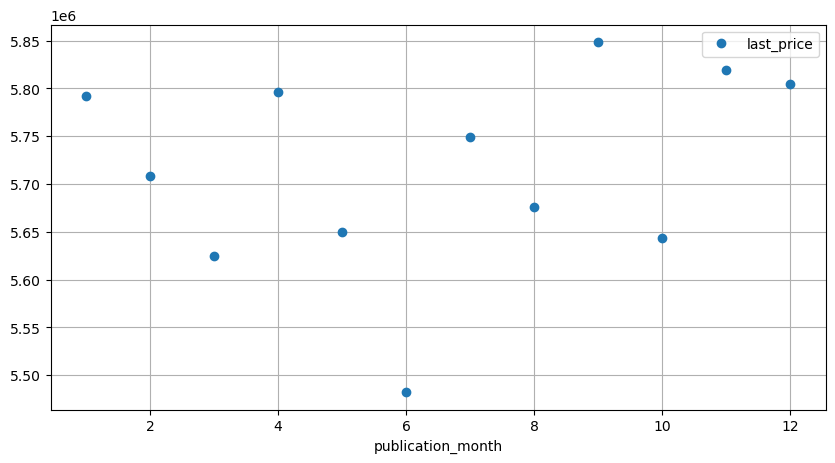

In [464]:
#построим диаграмму рассеяния, чтобы выяснить корреляцию между ценой квартиры и месяцем размещения объявления
data.pivot_table(index='publication_month', values='last_price').plot(grid=True, style='o', alpha=1, figsize=(10, 5))

**Сразу бросается в глаза, что дешевле всего квартры продавались в июне, а дороже всего - в сентябре. Вероятнее всего это связано с ростом спроса на квартиры в начале учебного года.**

<Axes: xlabel='publication_year'>

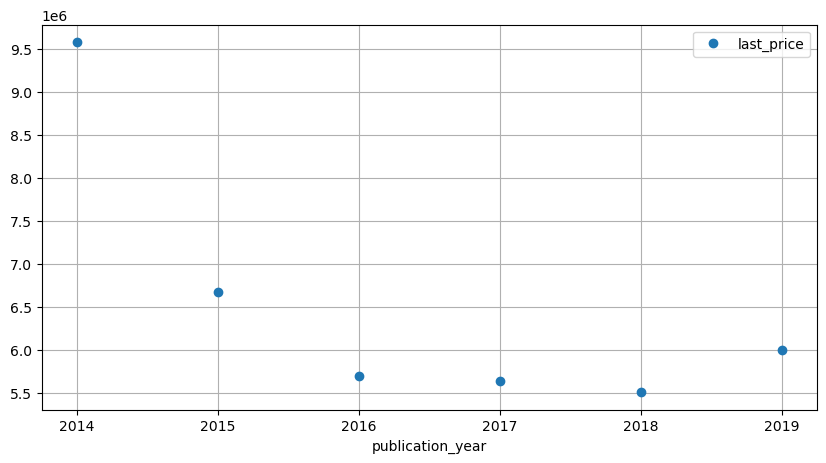

In [465]:
#построим диаграмму рассеяния, чтобы выяснить корреляцию между ценой квартиры и годом размещения объявления
data.pivot_table(index='publication_year', values='last_price').plot(grid=True, style='o', alpha=1, figsize=(10, 5))

**На основе полученной диаграммы видим, что в датасете присутствует информация за годы с 2014 по 2019. В 2014 году квартры продавались в среднем дороже почти на 3 млн за квартиру, чем в 2015 году! В 2016 цена на среднестатистическую квартру упала еще примерно на 1 млн. Такие цены были стабильны в период с 2016 по 2018 годы. В 2019 году вновь наблюдается подорожание примерно на 0,5 млн.**

In [466]:
#отсортируем 10 населённых пунктов с наибольшим числом объявлений и сохраним их в переменную popular_city
popular_city = data['locality_name'].value_counts().head(10)

In [467]:
#выведем их на экран
popular_city

Санкт-Петербург    15376
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               367
Колпино              337
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [468]:
#посчитаем среднюю цену за м2 для 10 населенных пунктов с наибольшим количеством объявлений
av_price = data.query('locality_name in (@popular_city.index)').pivot_table(index='locality_name', values='price_per_m2')

In [469]:
#переведём в целые числа для наиболее легкого восприятия
av_price = av_price.astype(int)

In [470]:
#выведем получившиеся данные для ознакомления
av_price.sort_values('price_per_m2', ascending=False)

,price_per_m2
locality_name,
Санкт-Петербург,110540
Пушкин,103130
Кудрово,95324
Парголово,90175
Мурино,86087
Шушары,78677
Колпино,75333
Гатчина,68746
Всеволожск,68654


**На основе полученной таблицы видно, что самая высокая цена за м2 в Санкт-Петербурге (114849 руб.), а самая низкая - в Выборге (58141 руб.).**

<Axes: xlabel='locality_name'>

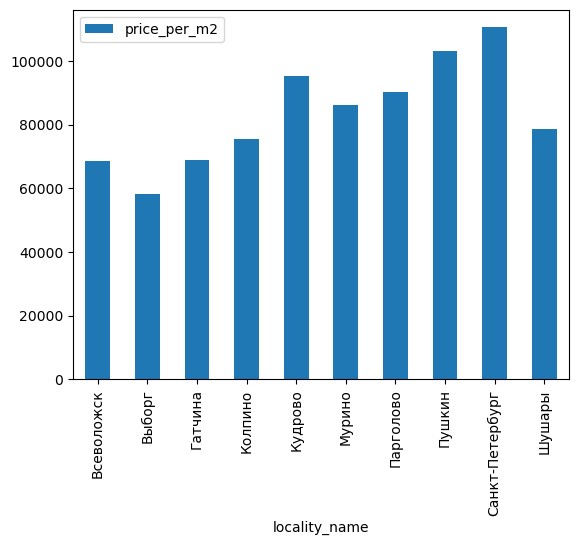

In [471]:
av_price.plot(kind='bar')

In [472]:
snt_ptr = data.loc[data['locality_name'] == 'Санкт-Петербург']

In [473]:
snt_ptr['cityCenters_nearest_km'].value_counts()

12.0    1603
15.0    1564
13.0    1457
14.0    1277
16.0    1264
11.0    1174
17.0     881
5.0      858
10.0     713
4.0      657
9.0      589
8.0      586
6.0      546
7.0      367
3.0      338
2.0      276
18.0     261
22.0     202
1.0      168
19.0     157
21.0     117
23.0      85
26.0      53
20.0      49
24.0      26
25.0      26
0.0       15
28.0       7
29.0       6
27.0       2
Name: cityCenters_nearest_km, dtype: int64

**На основании полученных выше данных будем считать, что квартиры расположенные на расстоянии до 16 км включительно от центра города подойдут для анализа стоимости м2 в зависимости от удалённости от центра города.**

In [474]:
#составим датафрейм только с квартирами, находящимися до 16 км (включительно) от центра
snt_ptr = snt_ptr[snt_ptr['cityCenters_nearest_km'] <= 16]

In [475]:
#ознакомимся с ним
snt_ptr

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,True,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,True,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,True,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0


In [476]:
#найдем среднюю цену каждого километра
snt_ptr.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='mean')

,price_per_m2
cityCenters_nearest_km,
0.0,120644.997884
1.0,143979.200355
2.0,127940.959665
3.0,116524.779350
4.0,124682.054805
5.0,131614.780488
6.0,130604.980584
7.0,131238.750912
8.0,124266.248617


<Axes: xlabel='cityCenters_nearest_km'>

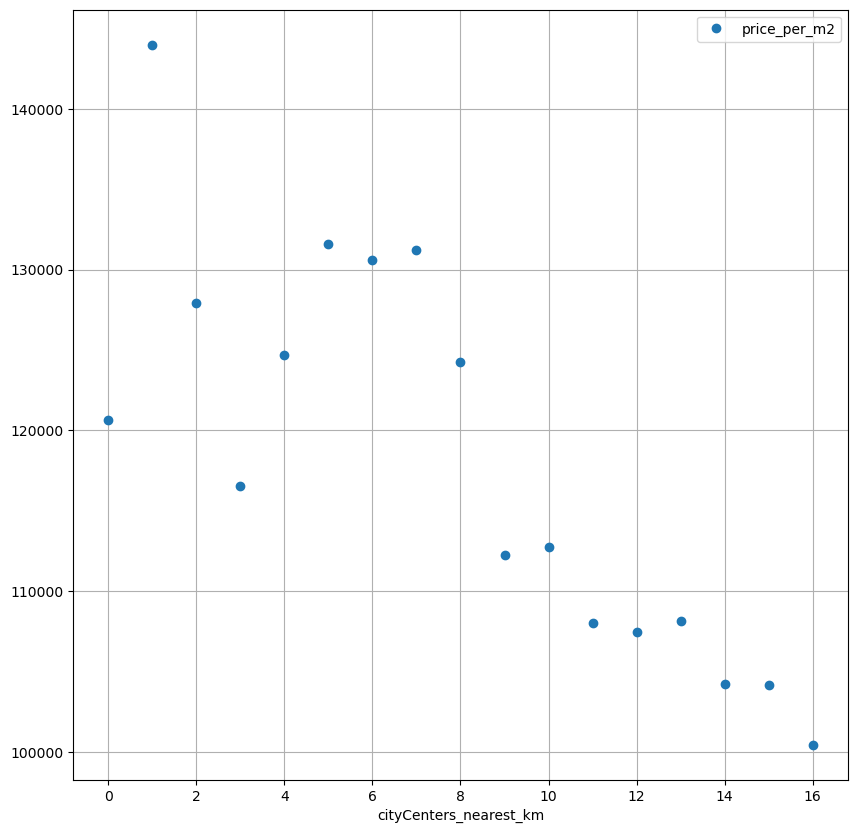

In [477]:
#построим график зависимости стоимости объектов от расстояния до центра города
snt_ptr.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='mean').plot(grid=True, style='o', alpha=1, figsize=(10, 10))

**Как правило, самые дорогие квартиры - на расстоянии до 8 км от центра включительно. В диапазоне с 9 до 16 км наблюдается отрицательная корреляция (чем дальше от центра, тем ниже цена), что предсказуемо и логично.**

In [478]:
#найдем среднее значение цены за метр квадратный
snt_ptr.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='mean').mean()

price_per_m2    118181.238914
dtype: float64

In [479]:
#найдем медианное значение цены за метр квадратный
snt_ptr.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='mean').median()

price_per_m2    116524.77935
dtype: float64

**Значения медианы и среднего арифметического получились близкие, что является хорошим признаком.**

### Общий вывод

**Нами был изучен датасет с объявлениями о продаже квартир в Санкт-Петербурге в период с 2014 по 2019 годы. Для корретного анализа сначала мы произвели предобработку данных: заполнили пропуски где это было возможно; исправили некорректные типы данных в столбцах; устранили неявные дубликаты; определили аномалии и исправили их, где это было возможно, и отбросили строки с выбивающимися значениями.<br>
Далее для наиболее полноценного анализа нами были добавлены новые столбцы в таблицу, которые впоследствии пригодились для расчетов и построения графиков.<br>
После этого мы приступили непосредственно к исследованию. Было установлено, что наиболее распространенная площадь квартир - примерно 50 м2. Цена квартиры преимущественно колеблется в диапазоне от 3 до 5 млн рублей. Больше всего на рынке представлены однокомнатные и двухкомнатные квартиры. Средняя удаленность продаваемых квартир от центра города - примерно 12 км.
На основании представленных данных мы проанализировали, что на стоимость объекта больше всего влияют такие факторы как общая площадь квартиры, жилая площадь, площадь кухни и этаж.<br> 
Продажа объекта обыкновенно занимает приблизительно 3 месяца. Самые дорогие квартиры продавались в самом Санкт-Петербурге, в пригородных населённых пунктах - дешевле. Также мы выяснили, что удалённость объекта от центра города особенно значительно влияет на его цену дальше 8 км от центра (цена постепенно понижается).**